<a href="https://colab.research.google.com/github/Kekoa-Pickett/ML-HW2/blob/main/hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Download the data
Let's download and uncompress our data and images here:

In [1]:
import platform
display(platform.system())
import os
file_download_link = 'https://www.dropbox.com/scl/fi/x4vhkglosags3qmg4h0p2/hw3data.zip?rlkey=kke6onzuc2rajohgislutjgg7&dl=0'
if os.name == 'nt':
    print('Please download your dataset here:', file_download_link)
else:
    # We need to first download the data here:
    !wget -O data.zip "$file_download_link" -o /dev/null
    !unzip data.zip > /dev/null

'Linux'

In [2]:
# If your data is on google drive then uncomment the code below to access
# your google drive.
#from google.colab import drive
#drive.mount('/content/drive')

## Running Tensorflow Keras on our Titanic dataset (25 points)
[tf.keras.models](https://www.tensorflow.org/api_docs/python/tf/keras/Model), [tf.keras.layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer)
### Q1: We will now implement customization via Keras. Be creative building you NN.
Make sure you set the verbose parameter to 0 when you train your model. Not doing so will result in your TA's being unable to grade your submission.
You can use history to plot your Loss/Metrics.
Make sure you generate a Loss/Metrics plot for each question.

In [3]:
# Prerequisite library imports
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

# Let's reimport our data
df = pd.read_csv('./data/titanic/train_data.csv')
X = df.drop(['Unnamed: 0', 'PassengerId'], axis=1)
y = df['Survived']
X = X.drop(columns = 'Survived')

### 1.1) Based on the imports above we will use those keras libraries to build our models. Here we want to implement a form of scaling to your data either minmax normalization or standardization using the sklearn.preprocessing libraries. Justify why you chose one over the other. Is this classfication or regression? Then make a basic neural network, you will compare the performance of this basic network to ones you develop later (10 points)

**Answer:** I am using minmax normalization because the data isn't split evenly so we don't have a normal distribution. This is a classification problem because either people survived or they didn't, no continuous inputs.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
display(X_train.shape)
display(y_train.shape)

(633, 14)

(633,)

In [5]:
# Please do your scalarization of X here: (after train test split).
# Scalarization means normalizing or standardizing
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
display(X_train.shape)
display(y_train.shape)


(633, 14)

(633,)

In [6]:
!pip install scikeras

In [7]:
# Write your model, and training here
model = Sequential()
model.add(Dense(units = 1, activation = 'relu', input_dim = X_train.shape[1]))
# model.add(Dense(units = 1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Now lets compile our model using the function compile
### Here we will use rmsprop as an optimizer and binary crossentropy as our loss function

In [8]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')

In [9]:
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import classification_report

estimator = KerasClassifier(model= model, epochs= 20, verbose = 0)
estimator.fit(X_train, y_train, verbose =0)
yhat_keras = estimator.predict(X_test)

print(classification_report(y_test, yhat_keras))

              precision    recall  f1-score   support

           0       0.71      0.93      0.81        92
           1       0.84      0.48      0.61        67

    accuracy                           0.74       159
   macro avg       0.78      0.71      0.71       159
weighted avg       0.77      0.74      0.72       159



### 1.2) Using the example for traindata above create a model using different activation functions by setting MYACTIVATIONFXN: (10 points)

Here is the example code you can use to build your own DNN after you check the shape of your X matrix. Similar to HW4
```python
# Hint! You can start with model.add(Dense(units = 16, activation = 'relu', input_dim = ?))
# Make sure the input_dim parameter is set to the number of features in your X matrix.
MYACTIVATIONFXN = 'SOMEFXN'
model.add(Dense(units = 14, activation = MYACTIVATIONFXN, input_dim = ?))
```


In [10]:
# Let's initialize our model
model = Sequential() # Initialising the ANN/DNN

In [11]:
# Let's Check the shape of our data!
# This should match your input layer
X.shape

(792, 14)

In [12]:
# If you decide to initially use a sigmoid, make sure the number of units matches the number of targets
# in this case we only have 1 target so for sigmoid you need to set units to 1
# Please use the example code above in the hint.
MYACTIVATIONFXN = 'relu'
model.add(Dense(units = 1, activation = MYACTIVATIONFXN, input_dim = X.shape[1]))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Now lets compile our model using the function compile
### Here we will use rmsprop as an optimizer and binary crossentropy as our loss function

In [13]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')


Implement tensorflows [early stopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) library. Feel free to play with the settings and parameters

In [14]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

### Here we will run our ANN/DNN using the fit function using a batch size of 1 and 10 epochs
Early stopping has been added to your model.fit call

In [15]:
# I have provided the code for you here:
# Feel free to play around with the code as you please
history = model.fit(X_train.astype('float'), y_train, batch_size = 1, epochs = 10, callbacks = [early_stopping], verbose = 0)


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


### 1.3) How does the error (in terms of accuracy, precision or recall) differ between the models you developed (latest model vs basic model above)? Write in one paragraph or less how the error differs and why. (5 points)

**Answer:** The biggest difference happens with everything when it comes to true values. With the callback, we were a lot more accurate than using my original model. With this new function, we are looking at small sample sizes and making sure we don't overfit which is why our scores are better, as it is more complex.

In [16]:
# Hint! Use the predict function if you don't have logits you will need to threshold your results. 0.5 is reasonable.
# Please see the BCC jupyter notebook to see how to do this
# Predict your train, test
# Evaluate your history
yhat_hist = model.predict(X_test.astype('float'))
yhat_hist = (yhat_hist > 0.5) * 1
print("Callback: \n", classification_report(y_test, yhat_hist))
print("Keras: \n", classification_report(y_test, yhat_keras))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Callback: 
               precision    recall  f1-score   support

           0       0.71      0.84      0.77        92
           1       0.71      0.54      0.61        67

    accuracy                           0.71       159
   macro avg       0.71      0.69      0.69       159
weighted avg       0.71      0.71      0.70       159

Keras: 
               precision    recall  f1-score   support

           0       0.71      0.93      0.81        92
           1       0.84      0.48      0.61        67

    accuracy                           0.74       159
   macro avg       0.78      0.71      0.71       159
weighted avg       0.77      0.74      0.72       159



## 2) Complex fit of flowers (30 points)

The cool stuff starts with more complex functions. The [Deep learning course from Andrew Ng](https://www.coursera.org/learn/neural-networks-deep-learning?specialization=deep-learning) show a way to predict [Rose-functions](https://en.wikipedia.org/wiki/Rose_(mathematics)) using a model with multiple nodes. Lets try that as well! This is similar to our example on tf playground.

Let's get started!

First we need to import the data:

In [32]:
import numpy as np
data = np.load('./data/rose/rose.npz')
X, Y = data['X'], data['Y']

To give a feel how it looks, we will first plot the rose, which has 7 petals:

In [33]:
import matplotlib.pyplot as plt
def testModelKeras(X, y, model, h=0.1, f=1.05):
    r = X.max()
    xmesh, ymesh = np.meshgrid(np.arange(-r*f, r*f+h, h), np.arange(-r*f, r*f+h, h))
    Z = model.predict(((np.c_[xmesh.ravel(), ymesh.ravel()])))
    Z = (Z > 0.5) * 1
    Z = Z.T.reshape(xmesh.shape)
    plt.contourf(xmesh, ymesh, Z, cmap=plt.cm.OrRd)
    plt.scatter(X[:,0], X[:,1], c=y.flatten().T, cmap=plt.cm.OrRd)

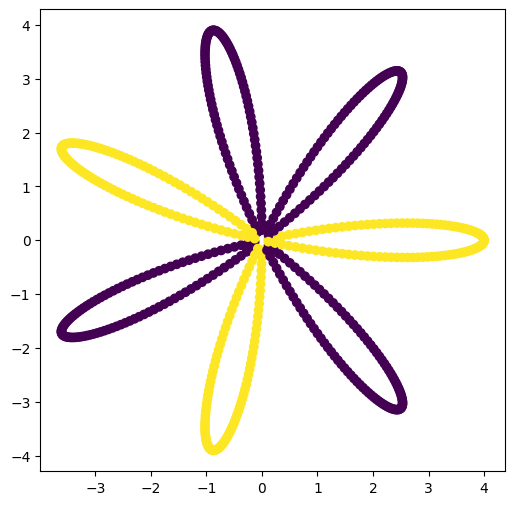

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(X[0,:], X[1,:], c=Y.flatten())

#### Q2: We will now implement customization via TensorFlow Keras

In [20]:
import numpy as np
data = np.load('./data/rose/rose.npz')
X, y = data['X'].transpose(), data['Y'].transpose()
display(X.shape)
display(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
display(X_train.shape)
display(y_train.shape)

# Let's initialize our model
model = Sequential() # Initialising the ANN

(688, 2)

(688, 1)

(550, 2)

(550, 1)

### 2.1) Using the example above, try different number of nodes(units) and different activation functions and build at least one or two models that shows some of your experimentation. How does your loss change? Is this classification or regression? Enter your answer below and why. (10 points)
Use history to extract the history of your metrics and loss

Enable call backs as you did in Q1

Please store your models and experimentation in different variables

**Answer:** My loss increased when I used sigmoid compared to relu. This is classification and this happened because this is not a linear answer so sigmoid had a harder time defining this.

In [46]:
# build your model
MYACTIVATIONFXN = 'relu'
model.add(Dense(units = 1, activation = MYACTIVATIONFXN, input_dim = X_train.shape[1]))
model2 = Sequential()
MYACTIVATIONFXN = 'sigmoid'
model2.add(Dense(units = 1, activation = MYACTIVATIONFXN, input_dim = X_train.shape[1]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
# compile your model
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')
model2.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')

In [48]:
# set up your early stopping call backs
early_stopping = tf.keras.callbacks.EarlyStopping()

In [50]:
history_model1 = model.fit(X_train.astype('float'), y_train, batch_size = 10, epochs = 10, verbose = 0)
yhat_model1 = model.predict(X_test.astype('float'))
yhat_model1 = (yhat_model1 > 0.5) * 1
print(classification_report(y_test, yhat_model1))
print(history_model1.history)
history_model2 = model2.fit(X_train.astype('float'), y_train, batch_size = 10, epochs = 10, verbose = 0)
yhat_model2 = model2.predict(X_test.astype('float'))
yhat_model2 = (yhat_model2 > 0.5) * 1
print(classification_report(y_test, yhat_model2))
print(history_model2.history)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        86
           1       0.00      0.00      0.00        52

    accuracy                           0.62       138
   macro avg       0.31      0.50      0.38       138
weighted avg       0.39      0.62      0.48       138

{'loss': [7.150573253631592, 7.150572776794434, 7.15057373046875, 7.150573253631592, 7.150573253631592, 7.15057373046875, 7.150574207305908, 7.150574207305908, 7.150573253631592, 7.150573253631592]}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       0.59      0.57      0.58        86
           1       0.33      0.35      0.34        52

    accuracy                           0.49       138
   macro avg       0.46      0.46      0.46       138
weighted avg       0.49      0.49      0.49       138

{'loss': [0.7841905355453491, 0.7647605538368225, 0.7485986948013306, 0.7351421117782593, 0.7227610349655151, 0.7118498682975769, 0.7021254301071167, 0.6940625309944153, 0.6876601576805115, 0.682396411895752]}


In [52]:
print(history_model1.history)

{'loss': [7.150573253631592, 7.150572776794434, 7.15057373046875, 7.150573253631592, 7.150573253631592, 7.15057373046875, 7.150574207305908, 7.150574207305908, 7.150573253631592, 7.150573253631592]}


### 2.2) Using 2.1 as a reference, create two new models and calculate your new error using classification report. Also, using the metrics, explain why you see the same or why you see a different error. (10 points)

**Answer:** I see a much lower loss for each of these because there is more layers which makes it able to use callbacks and go more in depth.

In [54]:
MYACTIVATIONFXN = 'tanh'
model2 = Sequential() # Initialising the ANN
model2.add(Dense(units = 14, activation = MYACTIVATIONFXN, input_dim = X_train.shape[1]))
model2.add(Dense(units = 1, activation = MYACTIVATIONFXN))
model2.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')
history_tenflw2 = model2.fit(X_train.astype('float'), y_train, batch_size = 10, epochs = 10, verbose = 0)

model2.fit(X_train, y_train, batch_size = 10, epochs = 20, verbose = 0)
yhat_tensflw2 = model2.predict(X_test.astype('float'))
yhat_tensflw2 = (yhat_tensflw2 > 0.5) * 1
print(classification_report(y_test, yhat_tensflw2))
print(history_tenflw2.history)

model3 = Sequential() # Initialising the ANN
MYACTIVATIONFXN = 'sigmoid'
model3.add(Dense(units = 14, activation = MYACTIVATIONFXN, input_dim = X_train.shape[1]))
model3.add(Dense(units = 1, activation = MYACTIVATIONFXN))
model3.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')
history_tenflw3 = model3.fit(X_train.astype('float'), y_train, batch_size = 10, epochs = 10, verbose = 0)

model3.fit(X_train, y_train, batch_size = 10, epochs = 20, verbose = 0)
yhat_tensflw3 = model3.predict(X_test.astype('float'))
yhat_tensflw3 = (yhat_tensflw3 > 0.5) * 1
print(classification_report(y_test, yhat_tensflw3))
print(history_tenflw3.history)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        86
           1       1.00      0.90      0.95        52

    accuracy                           0.96       138
   macro avg       0.97      0.95      0.96       138
weighted avg       0.97      0.96      0.96       138

{'loss': [5.157952785491943, 5.110164165496826, 3.8755767345428467, 2.946624994277954, 2.7788872718811035, 2.647212028503418, 1.9037601947784424, 0.5085389614105225, 0.4150835871696472, 0.3646238148212433]}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
              precision    recall  f1-score   support

           0       0.64      0.71      0.67        86
           1       0.42      0.35      0.38        52

    accuracy                           0.57       138
   macro avg       0.53      0.53      0.53       138
weighted avg       0.56      0.57      0.56       138

{'loss': [0.716627836227417, 0.6854878664016724, 0.6736432313919067, 0.6685892939567566, 0.6658680438995361, 0.6636437773704529, 0.6617630124092102, 0.6595460772514343, 0.6581786870956421, 0.656269907951355]}


### 2.3) Choose your best model! Now plot the new results using the plotting example shown above but using our newly trained best/coolest model. (10 points)

226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


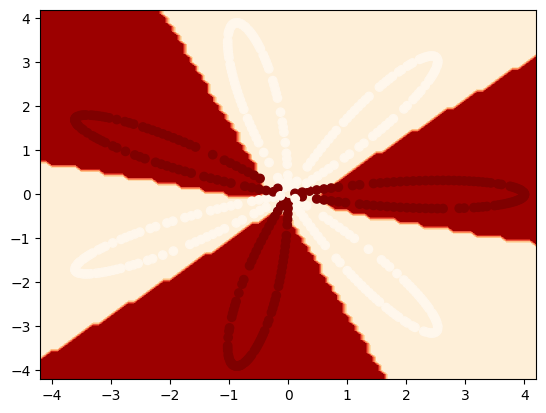

In [60]:
testModelKeras(X_train, y_train, model2)

## 3) Cats vs not cats (40 points)

#### Q3: Let's find some cute kittens!

In [61]:
import numpy as np
data = np.load('./data/cats/cats.npz')
X_train, y_train = data['Xtrain'].transpose(), data['Ytrain'].transpose()
X_test, y_test = data['Xtest'].transpose(), data['Ytest'].transpose()
display(X_train.shape)
display(y_train.shape)

# Let's initialize our model
model = Sequential() # Initialising the ANN

(209, 12288)

(209, 1)

### 3.1) Same as before, build a new model with different number of hidden layers, nodes and activation functions. Describe reason for any similarity or difference (20 points)

**Answer:** This one is very complex, with many layers which is why I would expect overfitting to occur.

In [62]:
from keras.models import Sequential
from keras.layers import Dense# Try using different iterations using a simple layout like above. 10, 100, 1000 epochs.
# What happens with your loss?
# I have written the basics of the code for you
MYACTIVATIONFXN = 'relu'
model.add(Dense(units = 128, activation = MYACTIVATIONFXN, input_dim = X_train.shape[1]))
model.add(Dense(units = 64, activation = MYACTIVATIONFXN))
model.add(Dense(units = 32, activation = MYACTIVATIONFXN))
model.add(Dense(units = 16, activation = MYACTIVATIONFXN))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Implement early stopping and [model checkpointing](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) to save your model weights. experiment with other call backs to get your best validation metric. For callbacks, you can save your weights and set up a monitor

In [65]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=10,
    patience=4,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=10
)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='./models/best_model.keras',
    monitor='val_loss',
    verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode='auto',
    save_freq='epoch',
    initial_value_threshold=None

)

Let's fit our data!

In [66]:
history = model.fit(X_train.astype('float'), y_train, batch_size = 10, epochs = 100, callbacks = [early_stopping, model_checkpoint], verbose = 0)

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


#### Try using different layers and activation function with different number of nodes
What happens when you add convolutional layers? What happens to our training loss? </br>
After intitializing your model, check if you need to rescale your data. If you do, make sure you [rescale](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Rescaling) using: ``` keras.layers.Rescaling(1./255) ``` </br>
If you do not, explain how you know that rescaling is not necessary. </br>
Here you will begin to add convolutional layers [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) as well as [max pooling 2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPooling2D). You typically want to do max pooling when you change the shape of your conv2d. Max pooling will focus on the most informative features and reduce the memory footprint </br>
This also requires reshaping form 1D to 2D. Hint: Look at the plotting fxn
```
model.add(Conv2D(32, kernel_size=3, activation='leakyrelu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D())
```
Make sure you [flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) before going back into 1D
Make sure your ouput layer performs a binary output for a class kitten and class not kitten
```
model.add(Flatten())
```
After you flatten, you can add your dense layers once again. </br></br>
<em> Note: As noted above, you will have to convert your 1D array back into a 2D array prior to running your convolutional NN. Hint: Look at your plotting function down below!!! </em>

**Answer:** When adding different layers, our data gets messed up so I had to restart and reshape the data in order to make sure everything was preset. Also, having the flatten helped counter the Conv2d so that I could add layers.

In [75]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Rescaling

model = Sequential() # Initialising the ANN

X_train = X_train.reshape(-1, 64, 64, 3)
X_test = X_test.reshape(-1, 64, 64, 3)

model.add(Rescaling(1./255))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')

history = model.fit(X_train.astype('float32'), y_train, batch_size = 10, epochs = 100, callbacks = [early_stopping, model_checkpoint], verbose = 0)
yhat_train = model.predict(X_train.astype('float32'))
yhat_train = (yhat_train > 0.5) * 1

yhat_test = model.predict(X_test.astype('float32'))
yhat_test = (yhat_test > 0.5) * 1
print(classification_report(y_test, yhat_test))

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step 
              precision    recall  f1-score   support

           0       0.40      0.59      0.48        17
           1       0.72      0.55      0.62        33

    accuracy                           0.56        50
   macro avg       0.56      0.57      0.55        50
weighted avg       0.61      0.56      0.57        50



Prediction step. Make sure you use ```yhat_train``` and ```yhat_test``` variable names for your predictions!

In [76]:
yhat_train = model.predict(X_train.astype('float'))
yhat_train = (yhat_train > 0.5) * 1
yhat_test =  model.predict(X_test.astype('float'))
yhat_test = (yhat_test > 0.5) * 1

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


### 3.2) Calculate your accuracy (10 points)
Here you will use both your classification report and your confusion matrix. </br>
Later you will be asked to calculate values manually. You are welcome to pull values from your reports.

In [78]:
# Hint! Use the predict function and threshold your results. 0.5 is reasonable.
# In your classification report since we are only predicting cats you will need to set the parameter labels
#labels=np.unique(yhat_test)
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

           0       0.40      0.59      0.48        17
           1       0.72      0.55      0.62        33

    accuracy                           0.56        50
   macro avg       0.56      0.57      0.55        50
weighted avg       0.61      0.56      0.57        50



### 3.3) Calculate your precision and recall manually as done in SA1. You cannot use values from your classification report or confusion matrix (10 points)

In [82]:
# Recall calculation
recall_score = np.sum(yhat_test + y_test == 2)/ np.sum(y_test == 1)
print(recall_score)

0.5454545454545454


In [80]:
# Precision calculation
precision_score = np.sum(yhat_test + y_test == 2)/ np.sum(yhat_test == 1)
print(precision_score)

0.72


### Let's plot!!!

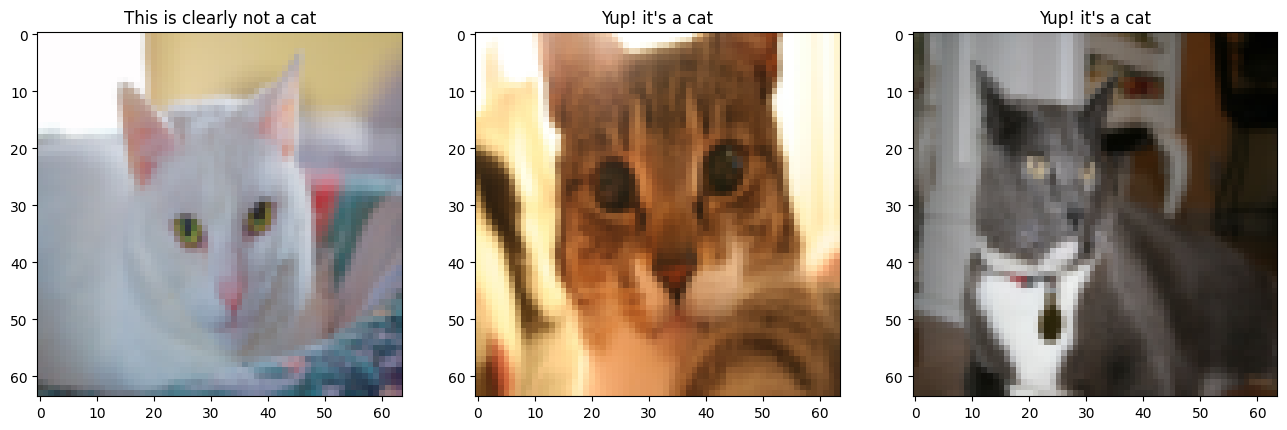

In [83]:
n = 3 # number of images to print
imgs = X_test.reshape([50, 64, 64, 3]) # here we reshape our images so that they are 2D again
fig, ax = plt.subplots(1, n, figsize=(16,8))
for ix in range(n):
    num = np.random.randint(imgs.shape[0]) # randomly selects from 51 images
    ax[ix].imshow(imgs[num])
    if yhat_test[num] == 0:
        ax[ix].set_title('This is clearly not a cat')
    else:
        ax[ix].set_title('Yup! it\'s a cat')

## 4) Collaborative Statement (5 points)
#### You must fill this out even if you worked alone to get credit.

It is mandatory to include a Statement of Collaboration in each submission, that follows the guidelines below.
Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.
All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments in particular, I encourage students to organize (perhaps using Piazza) to discuss the
task descriptions, requirements, possible bugs in the support code, and the relevant technical content before they
start working on it. However, you should not discuss the specific solutions, and as a guiding principle, you are
not allowed to take anything written or drawn away from these discussions (no photographs of the blackboard,
written notes, referring to Piazza, etc.). Especially after you have started working on the assignment, try to restrict
the discussion to Piazza as much as possible, so that there is no doubt as to the extent of your collaboration.

Even if you did not use any outside resources or collaborate with anyone, please state that explicitly in the space below.

## Round up!

I hope you all had fun, writing your own ANN. In my opinon, writing these things from the ground up is the best way to learn how it actually works. I hope that you see that these systems are not magical, but simple matrix multiplications, unfortunately just a very lot of them. The most difficult part is of course the back propagation, where we need to calculate the gradients. Our simple ANNs are quite doable, but adding more different layers to them, can make it a bit more cumbersome. Still the essence is very similar to what we have done today.

My suggestion is to play around with these structures, rewrite parts of them, or even better, write your own from scratch!


Please let me know if you have any comments!

## Apendix: For your reference

### Generating Rose Data

In [ ]:
def generateRoseData():
    k=7
    pointPerPetal = 100
    cutOff = 0.1
    r = 4

    theta = np.linspace(0,np.pi, pointPerPetal * k)
    xx = r * np.cos(k * theta) * np.cos(theta)
    yy = r * np.cos(k * theta) * np.sin(theta)
    cc = [np.ones(pointPerPetal) if ix % 3 == 0 else np.zeros(pointPerPetal) for ix in np.arange(k)]
    cc = np.roll(np.hstack(cc).astype(np.uint8), -pointPerPetal//2)
    x = xx[(xx**2 + yy**2)**0.5 > cutOff]
    y = yy[(xx**2 + yy**2)**0.5 > cutOff]
    col = cc[(xx**2 + yy**2)**0.5 > cutOff]
    X = np.vstack([x,y])
    Y = np.copy(col).reshape([1, -1])
    return X, Y
X, Y = generateRoseData()
np.savez_compressed('./data/rose/rose.npz', X=X, Y=Y)

### Processing Andrews CatvNotCat data

In [ ]:
# If you get an error here, install h5py via pip3 install h5py
import h5py

In [ ]:
# Data downloaded from:
# https://github.com/ridhimagarg/Cat-vs-Non-cat-Deep-learning-implementation
def processCatData():
    train_dataset = h5py.File("./data/cats/train_catvnoncat.h5", mode='r')
    Xtrain = np.array(train_dataset["train_set_x"])
    Y_train = np.array(train_dataset["train_set_y"])
    test_dataset = h5py.File("./data/cats/test_catvnoncat.h5", mode='r')
    Xtest = np.array(test_dataset["test_set_x"])
    Y_test = np.array(test_dataset["test_set_y"])
    X_train = Xtrain / 255
    X_test = Xtest / 255
    X_train = X_train.reshape(209, -1).T
    Y_train = Y_train.reshape(-1, 209)
    X_test = X_test.reshape(50, -1).T
    Y_test = Y_test.reshape(-1, 50)
    return X_train, X_test, Y_train, Y_test
Xtrain, Xtest, Ytrain, Ytest = processCatData()
np.savez_compressed('./data/cats/cats.npz', Xtrain=Xtrain, Xtest=Xtest, Ytrain=Ytrain, Ytest=Ytest)

# Credits
#### Edwin Solares - Updates to Questions and Dataset, Conversion to google colab, conversion to Tensorflow and Keras and preprocessing data to work with Keras.
https://linkedin.com/in/dennisbakhuis/ \
https://github.com/dennisbakhuis
